In [1]:
import pandas as pd
import numpy as np
from geopy.distance import great_circle
import seaborn as sns
from matplotlib import pyplot as plt

# making nn

In [41]:
den = pd.read_pickle('/home/nate/ds/metis/class_work/projects/project_luther/data/den_clean.pkl')

In [42]:
len(den)

1012

In [44]:
den.describe()

,home_price,beds,baths,house_sqft,lot_sqft,year_built,yearly_tax,min_dist
count,1.012000e+03,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,7.440964e+05,2.956522,2.775692,2353.950593,3023.604743,1983.301383,5070.839921,0.609897
std,7.029131e+05,1.383128,1.336574,1622.447420,3324.323292,36.933162,5629.952630,0.564178
min,5.000000e+04,0.000000,0.000000,120.000000,0.000000,1884.000000,0.000000,0.016355
25%,4.100000e+05,2.000000,2.000000,1310.750000,0.000000,1955.000000,1548.000000,0.231886
50%,5.842015e+05,3.000000,3.000000,1944.000000,1500.000000,2000.000000,3234.000000,0.415588
75%,7.990000e+05,4.000000,4.000000,2961.250000,6250.000000,2017.000000,7023.000000,0.848353
max,1.047500e+07,19.000000,9.000000,18696.000000,10800.000000,2019.000000,56112.000000,3.718386


In [13]:
den = den[den['year_built'] != 2019]

In [57]:
def nn_test(df, cord_col, target_col, num_nb):
    
    '''
    input: list of coordinates and number of nearest neighbors you want to check
    
    output: mean of the distance to the nearest neighbors
    '''
    
    cords = df[cord_col]
    n = num_nb
    
    means_col = []
    
    for house in cords:
        
        dst = []
        
        for i, neighbor in enumerate(cords):
            
            dst.append((i, great_circle(house, neighbor).miles))
        
        dst.sort(key=lambda x: x[1])
        
        mean = dst[1:(n+1)]
        
        
        targets = []
        
        for tup in mean:
            
            targets.append(df[target_col][tup[0]])
        
        
        means_col.append(sum(targets)/len(targets))
        
        
    return means_col

In [71]:
nn_hp_20 = nn_test(den, 'cords', 'home_price', 20)

In [72]:
len(nn_hp_20)

1012

In [73]:
den['nn_hp_20'] = nn_hp_20

In [88]:
dc.to_pickle('/home/nate/ds/metis/class_work/projects/project_luther/data/dc.pkl')

# evaluating model, graphing

In [6]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [62]:
dc = pd.read_pickle('/home/nate/ds/metis/class_work/projects/project_luther/data/dc.pkl')

In [65]:
dc.describe()

,home_price,year_built,min_dist,nn_hp,nn_hp_10,nn_hp_15,nn_hp_20
count,9.540000e+02,954.000000,954.000000,9.540000e+02,9.540000e+02,9.540000e+02,9.540000e+02
mean,6.710949e+05,1982.085954,0.577615,7.310672e+05,7.377687e+05,7.403116e+05,7.508305e+05
std,4.289576e+05,37.112276,0.454638,4.738559e+05,4.026911e+05,3.757585e+05,3.614311e+05
min,5.000000e+04,1884.000000,0.016355,1.915798e+05,2.125600e+05,2.145933e+05,2.127650e+05
25%,4.100000e+05,1955.000000,0.226883,4.727148e+05,5.152862e+05,5.357467e+05,5.600000e+05
50%,5.770000e+05,1999.500000,0.430154,6.099990e+05,6.444900e+05,6.441533e+05,6.623266e+05
75%,7.699750e+05,2017.000000,0.842656,8.116700e+05,8.269650e+05,8.237560e+05,8.523000e+05
max,2.799000e+06,2018.000000,2.269127,3.712800e+06,3.237890e+06,3.323267e+06,2.848142e+06


In [64]:
hp_mean = dc['home_price'].mean()
hp_std = dc['home_price'].std()

md_mean = dc['min_dist'].mean()
md_std = dc['min_dist'].std()

dc = dc[dc.home_price < hp_mean+3*hp_std]
dc = dc[dc.min_dist < md_mean+3*md_std]

dc = dc[dc['year_built'] != 2019]

In [68]:
954/1012

0.9426877470355731

In [69]:
dc['home_price'] = dc['home_price'].apply(np.log)
dc['min_dist'] = dc['min_dist'].apply(np.log)
dc['nn_hp'] = dc['nn_hp'].apply(np.log)
dc['nn_hp_10'] = dc['nn_hp_10'].apply(np.log)
dc['nn_hp_15'] = dc['nn_hp_15'].apply(np.log)
dc['nn_hp_20'] = dc['nn_hp_20'].apply(np.log)

In [70]:
dc = dc.sample(frac=1)

test = dc[:200]
dc = dc[200:]

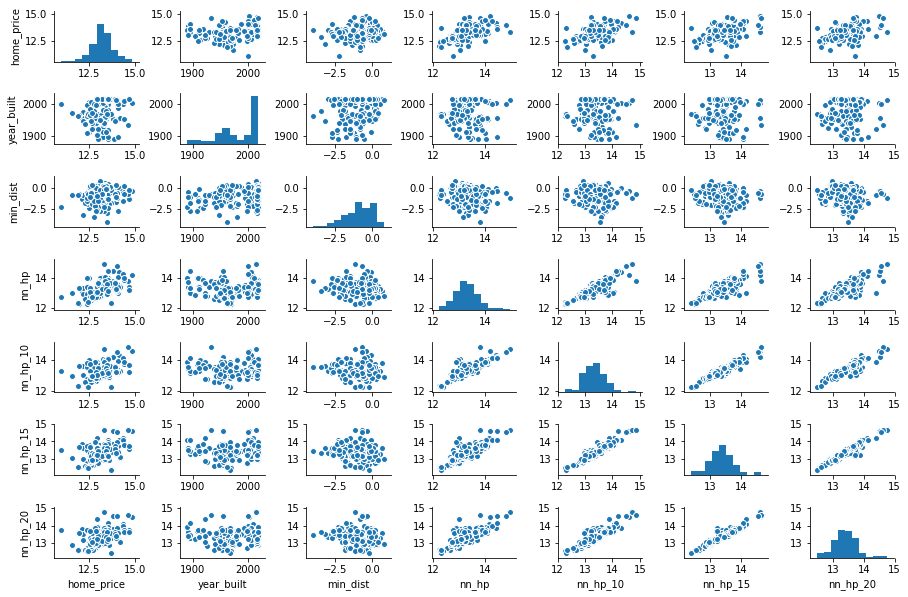

In [71]:
sns.pairplot(test, size = 1.2, aspect=1.5)
plt.show();

In [6]:
dc.describe()

,home_price,year_built,min_dist,nn_hp,nn_hp_10,nn_hp_15,nn_hp_20
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,13.293927,1982.594828,-0.878860,13.396108,13.437494,13.448324,13.466718
std,0.637925,37.419930,0.947872,0.515039,0.459012,0.431980,0.420047
min,10.819778,1884.000000,-4.113195,12.163060,12.266980,12.276500,12.267943
25%,12.923912,1955.000000,-1.481890,13.084859,13.160507,13.195564,13.236299
50%,13.278001,2000.000000,-0.864853,13.338586,13.388907,13.394776,13.432154
75%,13.601975,2017.000000,-0.144446,13.659839,13.648769,13.653376,13.693135
max,16.164502,2019.000000,1.313290,15.127297,14.990432,15.016459,14.862178


In [72]:
class Stats:
    
    def __init__(self, X, y, model):
        self.data = X
        self.target = y
        self.model = model
        ## degrees of freedom population dep. variable variance
        self._dft = X.shape[0] - 1   
        ## degrees of freedom population error variance
        self._dfe = X.shape[0] - X.shape[1] - 1  
    
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.target - self.model.predict(self.data)) ** 2
        return np.sum(squared_errors)
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        return np.sum(squared_errors)
    
    def r_squared(self):
        '''returns calculated value of r^2'''
        return 1 - self.sse()/self.sst()
    
    def adj_r_squared(self):
        '''returns calculated value of adjusted r^2'''
        return 1 - (self.sse()/self._dfe) / (self.sst()/self._dft)

def pretty_print_stats(stats_obj):
    '''returns report of statistics for a given model object'''
    items = ( ('sse:', stats_obj.sse()), ('sst:', stats_obj.sst()), 
             ('r^2:', stats_obj.r_squared()), ('adj_r^2:', stats_obj.adj_r_squared()) )
    for item in items:
        print('{0:8} {1:.4f}'.format(item[0], item[1]))

In [73]:
X = np.matrix(dc[['year_built', 'min_dist', 'nn_hp']]).reshape(-1,3)
y = np.array(dc['home_price'])

lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)

stats = Stats(X, y, lr)
pretty_print_stats(stats)

sse:     173.9351
sst:     253.3844
r^2:     0.3136
adj_r^2: 0.3108


In [74]:
X = np.matrix(dc[['year_built', 'min_dist', 'nn_hp']]).reshape(-1,3)
y = np.array(dc['home_price'])

poly = Pipeline([('poly', PolynomialFeatures(degree=3)),
           ('linear', LinearRegression(fit_intercept=False))])
poly.fit(X, y)

stats = Stats(X, y, poly)
pretty_print_stats(stats)

sse:     153.3791
sst:     253.3844
r^2:     0.3947
adj_r^2: 0.3923


In [75]:
X = np.matrix(dc[['min_dist', 'nn_hp']]).reshape(-1,2)
y = np.array(dc['home_price'])

lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)

stats = Stats(X, y, lr)
pretty_print_stats(stats)

sse:     178.9920
sst:     253.3844
r^2:     0.2936
adj_r^2: 0.2917


In [127]:
X = np.matrix(dc[['min_dist', 'nn_hp']]).reshape(-1,2)
y = np.array(dc['home_price'])

poly = Pipeline([('poly', PolynomialFeatures(degree=3)),
           ('linear', LinearRegression(fit_intercept=False))])
poly.fit(X, y)

stats = Stats(X, y, poly)
pretty_print_stats(stats)

sse:     172.6470
sst:     253.3844
r^2:     0.3186
adj_r^2: 0.3168


In [77]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse

def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [144]:
data = np.matrix(dc[['min_dist', 'nn_hp']]).reshape(-1,2)
target = np.array(dc['home_price'])

K = 10
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]

kf = KFold(n_splits=K, shuffle=True, random_state=42)

for alpha in alphas:
    train_errors = []
    validation_errors = []
    for train_index, val_index in kf.split(data, target):
        
        # split data
        X_train, X_val = data[train_index], data[val_index]
        y_train, y_val = target[train_index], target[val_index]
        
        # instantiate model
        lr = LinearRegression(fit_intercept=True)
#        lasso = Lasso(alpha=alpha, fit_intercept=True, random_state=77)
#         poly = Pipeline([('poly', PolynomialFeatures(degree=3)),
#                    ('linear', LinearRegression(fit_intercept=False))])

        #calculate errors
        train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, lr)
        
        # append to appropriate list
        train_errors.append(train_error)
        validation_errors.append(val_error)
    
    # generate report
    print('alpha: {:6} | mean(train_error): {:7} | mean(val_error): {}'.
          format(alpha,
                 round(np.mean(train_errors),4),
                 round(np.mean(validation_errors),4)))

alpha: 0.0001 | mean(train_error):  0.2373 | mean(val_error): 0.24
alpha:  0.001 | mean(train_error):  0.2373 | mean(val_error): 0.24
alpha:   0.01 | mean(train_error):  0.2373 | mean(val_error): 0.24
alpha:    0.1 | mean(train_error):  0.2373 | mean(val_error): 0.24
alpha:      1 | mean(train_error):  0.2373 | mean(val_error): 0.24
alpha:   10.0 | mean(train_error):  0.2373 | mean(val_error): 0.24


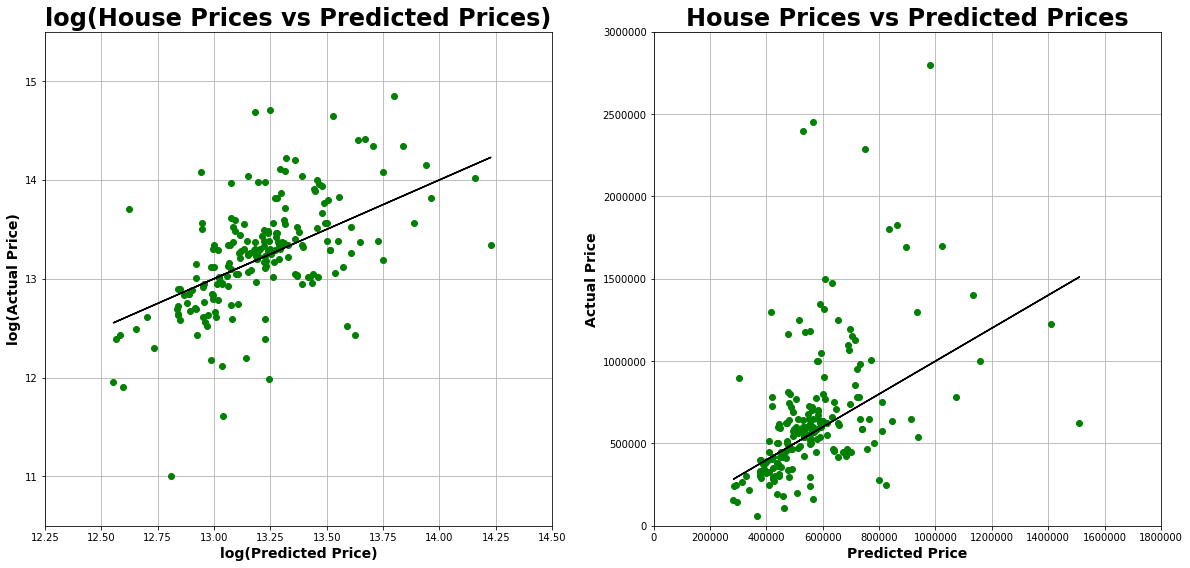

In [147]:
predictions = lr.predict(np.array(test.iloc[:][['min_dist', 'nn_hp']]).reshape(-1,2))


plt.figure(figsize=(20,20))


plt.subplot(221)
plt.plot(predictions, test['home_price'], 'go', predictions, predictions, 'k')
plt.title('log(House Prices vs Predicted Prices)', fontsize=24, fontweight='bold')
plt.ylabel('log(Actual Price)', fontsize=14, fontweight='bold')
plt.xlabel('log(Predicted Price)', fontsize=14, fontweight='bold')
plt.grid()
plt.xlim(12.25,14.5)
plt.ylim(10.5,15.5)


plt.subplot(222)
plt.plot(np.exp(predictions), np.exp(test['home_price']), 'go', np.exp(predictions), np.exp(predictions), 'k')
plt.title('House Prices vs Predicted Prices', fontsize=24, fontweight='bold')
plt.ylabel('Actual Price', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14, fontweight='bold')
plt.grid()
plt.xlim(0,1.8e6)
plt.ylim(0,3e6)
plt.show();

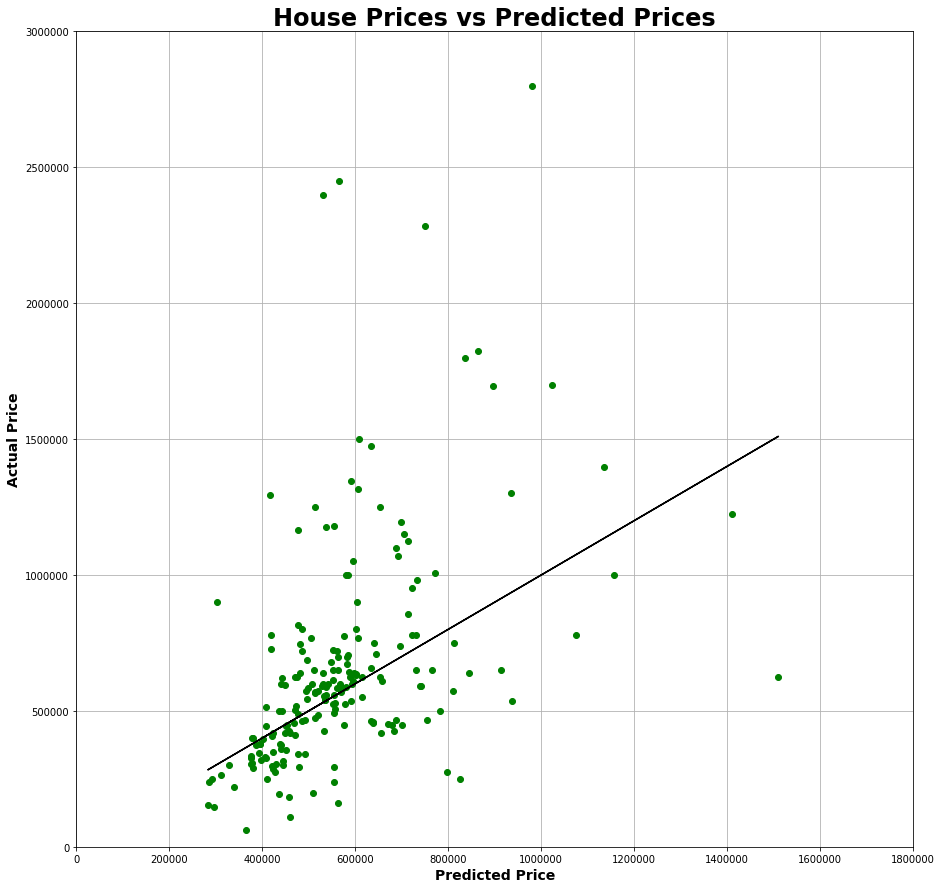

In [150]:
predictions = lr.predict(np.array(test.iloc[:][['min_dist', 'nn_hp']]).reshape(-1,2))



plt.figure(figsize=(15,15))

plt.plot(np.exp(predictions), np.exp(test['home_price']), 'go', np.exp(predictions), np.exp(predictions), 'k')
plt.title('House Prices vs Predicted Prices', fontsize=24, fontweight='bold')
plt.ylabel('Actual Price', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14, fontweight='bold')
plt.grid()
plt.xlim(0,1.8e6)
plt.ylim(0,3e6)
plt.show();

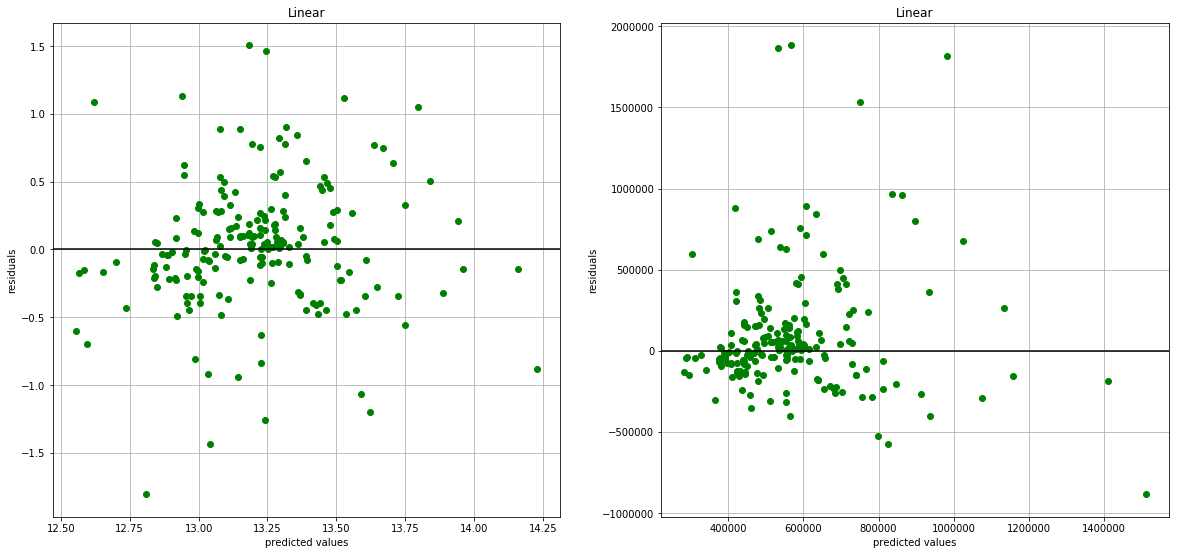

In [142]:
plt.figure(figsize=(20,20))

plt.subplot(221)
plt.plot(predictions, test['home_price']-predictions, 'go')
plt.axhline(y=0, color='k')
plt.grid()
plt.title('Linear')
plt.xlabel('predicted values')
plt.ylabel('residuals')


plt.subplot(222)
plt.plot(np.exp(predictions), np.exp(test['home_price'])-np.exp(predictions), 'go')
plt.axhline(y=0, color='k')
plt.grid()
plt.title('Linear')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.show();

# potential trolling

In [140]:
X = np.matrix(dc['nn_hp_15']).reshape(-1,1)
y = np.array(dc['nn_hp_20'])

lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)

stats = Stats(X, y, lr)
pretty_print_stats(stats)

sse:     10.4701
sst:     116.7854
r^2:     0.9103
adj_r^2: 0.9102


In [113]:
X = np.array(dc['nn_hp_15'])
X = np.c_[np.ones(X.shape[0]), X]
y = np.array(dc['nn_hp_20'])

In [114]:
def ols(X, y):
    '''returns parameters based on Ordinary Least Squares.'''
    xtx = np.dot(X.T, X) ## x-transpose times x
    inv_xtx = np.linalg.inv(xtx) ## inverse of x-transpose times x
    xty = np.dot(X.T, y) ## x-transpose times y
    return np.dot(inv_xtx, xty)

# find parameters
params = ols(X,y)
print('intercept: {} | slope: {}'.format(params[0], params[1]))

intercept: 1.0282176957007323 | slope: 0.9249707954393216


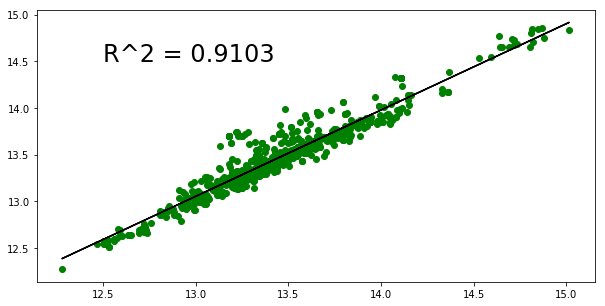

In [122]:
x = dc['nn_hp_15']
y = dc['nn_hp_20']
abline = [params[1]*i + params[0] for i in x]

plt.figure(figsize=(10,5))
plt.plot(x, y, 'go', x, abline, 'k')
plt.text(12.5, 14.5, 'R^2 = 0.9103', fontsize=24)
plt.show();

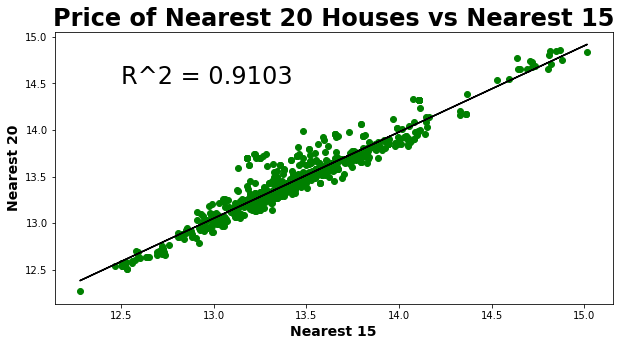

In [141]:
x = dc['nn_hp_15']
y = dc['nn_hp_20']
abline = [params[1]*i + params[0] for i in x]

plt.figure(figsize=(10,5))
plt.plot(x, y, 'go', x, abline, 'k')
plt.title('Price of Nearest 20 Houses vs Nearest 15', fontsize=24, fontweight='bold')
plt.ylabel('Nearest 20', fontsize=14, fontweight='bold')
plt.xlabel('Nearest 15', fontsize=14, fontweight='bold')
plt.text(12.5, 14.5, 'R^2 = 0.9103', fontsize=24)
plt.show();